# 1 .Convolutional Depth Auto encoder 

CNN Auto Encoder for KITT data sets

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from process_data import  process_data
batch_size=20
num_epochs=100
hidden_size=1024
RESTORE=0
SEED = None
%matplotlib inline 
# display inline

In [2]:
data=np.load('../depth_data.npy')
data=np.transpose(data,(0,2,1,3))# swap the two dimensions
print(data.shape)

(30602, 18, 60, 1)


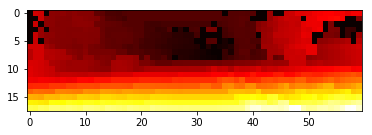

In [20]:
plt.imshow(data[0,:,:,0],cmap="hot")# shape (18,60,1)

In [7]:
inputs= tf.placeholder(tf.float32, (None, 18,60,1), name="input")
outputs=tf.placeholder(tf.float32, (None, 18,60,1), name="ouput")

In [8]:
### Encoder use high level module 
conv1=tf.layers.conv2d(inputs=inputs,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,18,60,16)

pool1=tf.layers.max_pooling2d(conv1,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,9,30,16)

conv2=tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
# now (batch,9,30,8)

pool2=tf.layers.max_pooling2d(conv2,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,5,15,8)
#########################################################################################

### Decoder using high level modules 
upsample1=tf.image.resize_images(pool2,size=(9,30),
                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# now (batch,9,30,8)
conv4=tf.layers.conv2d(inputs=upsample1,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,9,30,8)

upsample2 = tf.image.resize_images(conv4, size=(18,60),
                                   method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#now (batch,18,60,8)
out=tf.layers.conv2d(inputs=upsample2,filters=1,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)

In [17]:
# define loss
learning_rate=1e-4
loss=tf.nn.l2_loss(out-outputs)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss)

init=tf.global_variables_initializer()

In [18]:
train_size=data.shape[0]
train_indices=range(train_size)

Epoch: 0... Training loss: 264.9532
Epoch: 1... Training loss: 295.4953
Epoch: 2... Training loss: 276.0198
Epoch: 3... Training loss: 278.4419
Epoch: 4... Training loss: 340.4276
Epoch: 5... Training loss: 339.8503
Epoch: 6... Training loss: 304.5458
Epoch: 7... Training loss: 267.9150
Epoch: 8... Training loss: 273.1943
Epoch: 9... Training loss: 425.8976
Epoch: 10... Training loss: 359.5096
Epoch: 11... Training loss: 225.5667
Epoch: 12... Training loss: 258.3123
Epoch: 13... Training loss: 306.8797
Epoch: 14... Training loss: 433.6696
Epoch: 15... Training loss: 308.1838
Epoch: 16... Training loss: 372.8119
Epoch: 17... Training loss: 326.9741
Epoch: 18... Training loss: 313.5176
Epoch: 19... Training loss: 355.4074
Epoch: 20... Training loss: 231.9431
Epoch: 21... Training loss: 237.2047
Epoch: 22... Training loss: 204.4193
Epoch: 23... Training loss: 224.8986
Epoch: 24... Training loss: 257.5516
Epoch: 25... Training loss: 280.3615
Epoch: 26... Training loss: 167.8187
Epoch: 27..

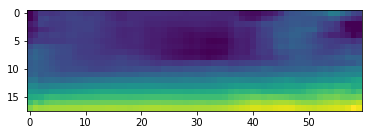

In [19]:
# training process
with tf.Session() as sess:
    sess.run(init)
    for ipochs in range(30):
        perm_indices=np.random.permutation(train_indices)
        for step in range(int(train_size/batch_size)):
            offset=(step*batch_size)%(train_size-batch_size)
            batch_indices=perm_indices[offset:(offset+batch_size)]
            
            l,_=sess.run([loss,optimizer],feed_dict={inputs:data[batch_indices],
                                                     outputs:data[batch_indices]})
            
        print("Epoch: {}...".format(ipochs),
                       "Training loss: {:.4f}".format(l))
            
#test on reconstruction  

    reconstruction=sess.run(out,feed_dict={inputs:data[0:1]})
    
plt.imshow(reconstruction[0,:,:,0])

# autoencoder can reconstruct smoother depth 

# Reconstruction

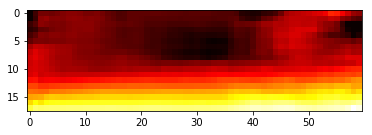

In [21]:
plt.imshow(reconstruction[0,:,:,0],cmap='hot')

# input image

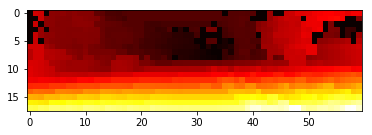

In [22]:
plt.imshow(data[0,:,:,0],cmap="hot")# shape (18,60,1)